In [29]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.metrics import roc_auc_score, adjusted_rand_score, log_loss
from sklearn.datasets import make_classification
%config IPCompleter.greedy=True
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV, LinearRegression
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
import scipy
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 17

In [13]:
df = pd.read_csv("../files/weights_heights.csv")

In [3]:
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


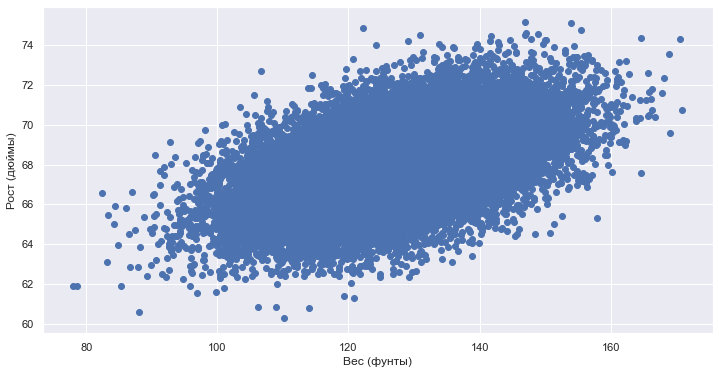

In [5]:
plt.scatter(df['Weight'], df['Height']);
plt.xlabel('Вес (фунты)')
plt.ylabel('Рост (дюймы)');

In [6]:
X, y = df['Weight'].values, df['Height'].values

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [10]:
X_train

array([120.0319, 111.0182, 131.4104, ..., 120.1386, 141.8106, 125.9388])

In [9]:
X_train.reshape([X_train.shape[0], 1])

array([[120.0319],
       [111.0182],
       [131.4104],
       ...,
       [120.1386],
       [141.8106],
       [125.9388]])

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [32]:
sgd = SGDRegressor(random_state=RANDOM_STATE)
linreg = LinearRegression()

In [34]:
sgd.fit(X_train_scaled, y_train)
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
mean_squared_error(y_valid, sgd.predict(X_valid_scaled))

2.670830767667634

In [37]:
mean_squared_error(y_valid, linreg.predict(X_valid_scaled))

2.670830767667634

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
cancer = load_breast_cancer()
# поменяем метки в y с 0 на -1
X, y = cancer.data, [-1 if i == 0 else 1 for i in cancer.target]

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [50]:
from sklearn.datasets import load_files